# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [7]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [8]:
sinasc_idade = sinasc_raw[['munResNome','IDADEMAE', 'IDADEPAI']]
sinasc_idade

,munResNome,IDADEMAE,IDADEPAI
0,Alta Floresta D'Oeste,19,26.0
1,Alta Floresta D'Oeste,29,24.0
2,Alta Floresta D'Oeste,37,32.0
3,Alto Alegre dos Parecis,30,24.0
4,Alta Floresta D'Oeste,30,27.0
...,...,...,...
27023,Vilhena,32,35.0
27024,Chupinguaia,19,NaN
27025,Vilhena,24,30.0
27026,Vilhena,21,24.0


In [9]:
media_idade_maepai_por_mun = sinasc_idade.groupby('munResNome').mean().round(0) #round para arredondar os valores em inteiros (idade)
media_idade_maepai_por_mun

,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,26.0,30.0
Alto Alegre dos Parecis,25.0,29.0
Alto Paraíso,25.0,29.0
Alvorada D'Oeste,26.0,31.0
Ariquemes,26.0,32.0
Buritis,26.0,31.0
Cabixi,26.0,34.0
Cacaulândia,26.0,36.0
Cacoal,27.0,31.0


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [15]:
base_peso_bebe = sinasc_raw.loc[sinasc_raw['DTNASC'] == '2019-05-12', ['ESCMAE','SEXO','PESO']]
#nasc_aniversario = base_peso_bebe[base_peso_bebe['DTNASC' == '2019-05-12']]

#base_peso_bebe.groupby('DTNASC')

base_peso_bebe.groupby(['ESCMAE', 'SEXO']).agg(np.mean).round(0)

PESO
ESCMAE          SEXO             
1 a 3 anos      Feminino   2600.0
12 anos ou mais Feminino   3211.0
                Masculino  3592.0
4 a 7 anos      Feminino   3140.0
                Masculino  3587.0
8 a 11 anos     Feminino   3187.0
                Masculino  3516.0

In [16]:
base_peso_bebe.groupby(['SEXO', 'ESCMAE']).agg(np.mean).round(0) 
#organizacao para melhoria de visualizacao (devido a repeticao de masculino e feminino)

PESO
SEXO      ESCMAE                 
Feminino  1 a 3 anos       2600.0
          12 anos ou mais  3211.0
          4 a 7 anos       3140.0
          8 a 11 anos      3187.0
Masculino 12 anos ou mais  3592.0
          4 a 7 anos       3587.0
          8 a 11 anos      3516.0

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [17]:
sinasc_idade['munResNome'].value_counts()

Porto Velho                  8437
Ji-Paraná                    2182
Ariquemes                    1729
Vilhena                      1590
Cacoal                       1374
Rolim de Moura                927
Jaru                          881
Guajará-Mirim                 781
Ouro Preto do Oeste           631
Pimenta Bueno                 616
Buritis                       583
Machadinho D'Oeste            500
Espigão D'Oeste               450
Nova Mamoré                   432
Alta Floresta D'Oeste         367
São Miguel do Guaporé         353
Candeias do Jamari            337
Presidente Médici             304
São Francisco do Guaporé      303
Nova Brasilândia D'Oeste      261
Cerejeiras                    237
Costa Marques                 233
Alto Paraíso                  226
Colorado do Oeste             214
Alvorada D'Oeste              205
Cujubim                       205
Monte Negro                   199
Urupá                         170
Seringueiras                  168
Campo Novo de 

In [18]:
sinasc_idade['munResNome'].value_counts().sort_values().head(5)

#o municipio com menor nascimento é castanheiras (desconsiderando o municipio ignorado)

Município ignorado - RO     1
Castanheiras               32
Pimenteiras do Oeste       40
Primavera de Rondônia      43
Parecis                    44
Name: munResNome, dtype: int64

In [19]:
sinasc_idade.isna().sum()

munResNome        0
IDADEMAE          0
IDADEPAI      19421
dtype: int64

In [22]:
base_pai = sinasc_idade.loc[sinasc_idade['munResNome'] == 'Castanheiras', ['munResNome', 'IDADEPAI']]
base_mae = sinasc_idade.loc[sinasc_idade['munResNome'] == 'Castanheiras', ['munResNome', 'IDADEMAE']]

In [29]:
base_mae.groupby('munResNome').agg([('Média','mean'), ('Maior','max'), ('Menor','min')]) #agrupamento mae

IDADEMAE            
                 Média Maior Menor
munResNome                        
Castanheiras  27.28125    39    17

In [30]:
base_pai.groupby('munResNome').agg([('Média','mean'), ('Maior','max'), ('Menor','min')]) #agrupamento pai

IDADEPAI            
                  Média Maior Menor
munResNome                         
Castanheiras  30.392857  43.0  17.0

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [40]:
mais_bebe = sinasc_raw[['DTNASC','munResNome','QTDFILVIVO','IDADEPAI']]
mais_bebe

,DTNASC,munResNome,QTDFILVIVO,IDADEPAI
0,2019-02-19,Alta Floresta D'Oeste,0.0,26.0
1,2019-02-21,Alta Floresta D'Oeste,1.0,24.0
2,2019-02-25,Alta Floresta D'Oeste,2.0,32.0
3,2019-03-20,Alto Alegre dos Parecis,0.0,24.0
4,2019-03-23,Alta Floresta D'Oeste,1.0,27.0
...,...,...,...,...
27023,2019-12-13,Vilhena,1.0,35.0
27024,2019-10-04,Chupinguaia,0.0,NaN
27025,2019-08-02,Vilhena,0.0,30.0
27026,2019-12-23,Vilhena,1.0,24.0


In [41]:
mais_bebe.dtypes

DTNASC         object
munResNome     object
QTDFILVIVO    float64
IDADEPAI      float64
dtype: object

In [42]:
mais_bebe['DTNASC'] = pd.to_datetime(mais_bebe['DTNASC'])

/var/folders/rh/bjc5nd5j3ms0yq3xbl3f03n80000gn/T/ipykernel_2130/2471474609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mais_bebe['DTNASC'] = pd.to_datetime(mais_bebe['DTNASC'])


In [44]:
mais_bebe

,DTNASC,munResNome,QTDFILVIVO,IDADEPAI
0,2019-02-19,Alta Floresta D'Oeste,0.0,26.0
1,2019-02-21,Alta Floresta D'Oeste,1.0,24.0
2,2019-02-25,Alta Floresta D'Oeste,2.0,32.0
3,2019-03-20,Alto Alegre dos Parecis,0.0,24.0
4,2019-03-23,Alta Floresta D'Oeste,1.0,27.0
...,...,...,...,...
27023,2019-12-13,Vilhena,1.0,35.0
27024,2019-10-04,Chupinguaia,0.0,NaN
27025,2019-08-02,Vilhena,0.0,30.0
27026,2019-12-23,Vilhena,1.0,24.0


In [43]:
mais_bebe.dtypes

DTNASC        datetime64[ns]
munResNome            object
QTDFILVIVO           float64
IDADEPAI             float64
dtype: object

In [45]:
mais_bebe_mar = mais_bebe[mais_bebe['DTNASC'].dt.month == 3]

In [46]:
mais_bebe_mar['munResNome'].value_counts().head(5)

#O municipio que mais nasceu bebe no mes de marco foi em Porto velho

Porto Velho    744
Ji-Paraná      188
Vilhena        148
Ariquemes      141
Cacoal         133
Name: munResNome, dtype: int64

In [47]:
mais_bebe_mar_porto = mais_bebe_mar[mais_bebe_mar['munResNome'] == 'Porto Velho']
mais_bebe_mar_porto.head(10)

,DTNASC,munResNome,QTDFILVIVO,IDADEPAI
612,2019-03-09,Porto Velho,0.0,NaN
700,2019-03-28,Porto Velho,1.0,NaN
3232,2019-03-11,Porto Velho,0.0,NaN
3238,2019-03-13,Porto Velho,1.0,NaN
6818,2019-03-01,Porto Velho,2.0,41.0
6819,2019-03-02,Porto Velho,1.0,35.0
6820,2019-03-02,Porto Velho,NaN,NaN
6833,2019-03-04,Porto Velho,1.0,NaN
6840,2019-03-05,Porto Velho,1.0,NaN
6847,2019-03-06,Porto Velho,NaN,NaN


In [51]:
#- qual a quantidade de filhos vivos media, maxima, minima nesse municipio?

mais_bebe_mar_porto.groupby('munResNome').aggregate([('Média','mean'), ('Maior','max'), ('Menor','min')])
mais_bebe_mar_porto[['munResNome', 'QTDFILVIVO']].groupby('munResNome').aggregate([('Média','mean'), ('Maior','max'), ('Menor','min')]) #agrupamento ajustado para apenas municipio e filhos vivos


QTDFILVIVO            
                 Média Maior Menor
munResNome                        
Porto Velho   1.295056   9.0   0.0

In [54]:
#- qual a idade media, maxima, minima dos pais nesse municipio?

mais_bebe_mar_porto[['munResNome', 'IDADEPAI']].groupby('munResNome').aggregate([('Média','mean'), ('Maior','max'), ('Menor','min')]) #agrupamento ajustado para apenas municipio e filhos vivos


IDADEPAI            
                 Média Maior Menor
munResNome                        
Porto Velho  34.629032  62.0  19.0

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [60]:
sinasc_analise = sinasc_raw.copy()

sinasc_analise = sinasc_analise.loc[sinasc_analise['munResNome'] != 'Município ignorado - RO', 
                                ['DTNASC','munResNome', 'GESTACAO','QTDFILVIVO','IDADEMAE', 'IDADEPAI', 'SEXO', 'APGAR5', 'PARTO', 'ESCMAE']]

sinasc_analise['DTNASC'] = pd.to_datetime(sinasc_analise['DTNASC'])

sinasc_analise['MESNASC'] = pd.to_datetime(sinasc_analise['DTNASC']).dt.month

sinasc_analise.head(5)

,DTNASC,munResNome,GESTACAO,QTDFILVIVO,IDADEMAE,IDADEPAI,SEXO,APGAR5,PARTO,ESCMAE,MESNASC
0,2019-02-19,Alta Floresta D'Oeste,37 a 41 semanas,0.0,19,26.0,Masculino,10.0,Cesáreo,8 a 11 anos,2
1,2019-02-21,Alta Floresta D'Oeste,37 a 41 semanas,1.0,29,24.0,Feminino,9.0,Cesáreo,8 a 11 anos,2
2,2019-02-25,Alta Floresta D'Oeste,37 a 41 semanas,2.0,37,32.0,Feminino,10.0,Cesáreo,8 a 11 anos,2
3,2019-03-20,Alto Alegre dos Parecis,37 a 41 semanas,0.0,30,24.0,Feminino,10.0,Cesáreo,12 anos ou mais,3
4,2019-03-23,Alta Floresta D'Oeste,37 a 41 semanas,1.0,30,27.0,Feminino,10.0,Cesáreo,8 a 11 anos,3


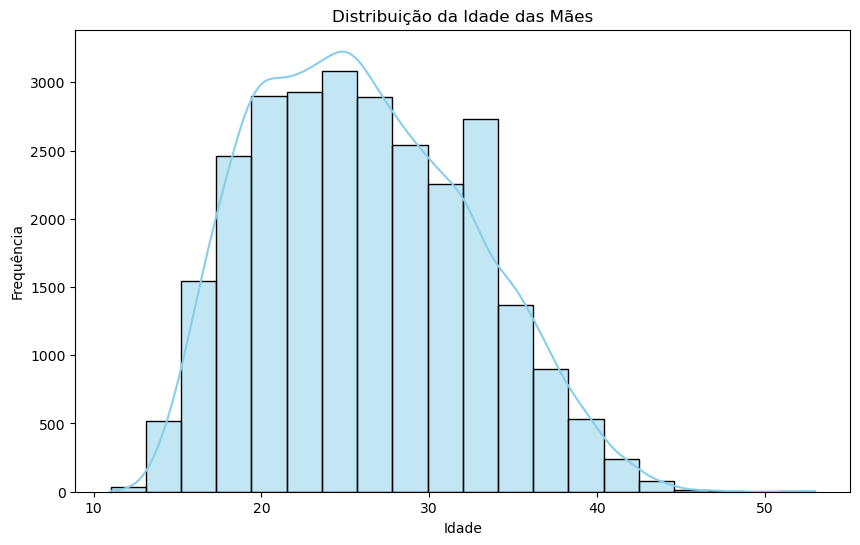

In [61]:
#distribuição da idade das mães no momento do parto.

plt.figure(figsize=(10, 6))
sns.histplot(sinasc_analise['IDADEMAE'], bins=20, kde=True, color='skyblue')
plt.title('Distribuição da Idade das Mães')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

#A maior frequencia de parto está entre os 20 e 30 anos de idade da Mae, com pico em torno dos 25.

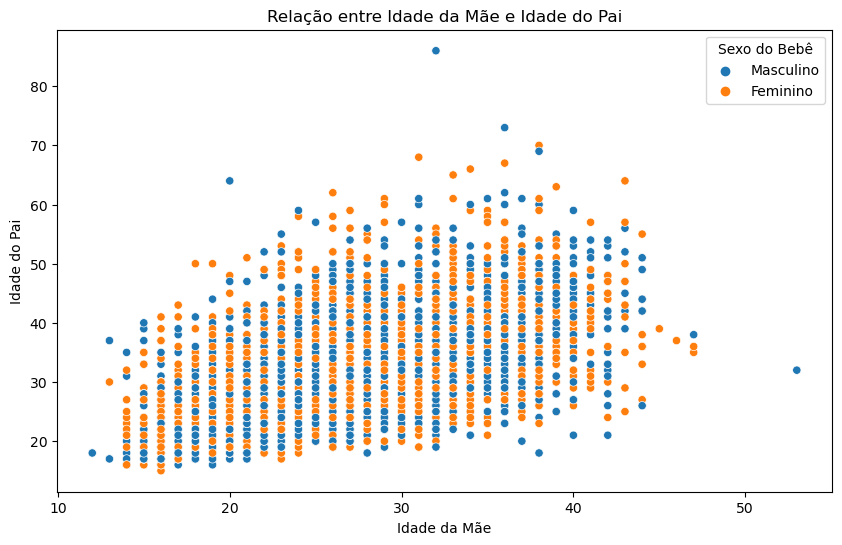

In [62]:
#podemos explorar se há alguma correlação entre a idade da mãe e a idade do pai dos recém-nascidos.

plt.figure(figsize=(10, 6))
sns.scatterplot(x='IDADEMAE', y='IDADEPAI', data=sinasc_analise, hue='SEXO')
plt.title('Relação entre Idade da Mãe e Idade do Pai')
plt.xlabel('Idade da Mãe')
plt.ylabel('Idade do Pai')
plt.legend(title='Sexo do Bebê')
plt.show()

#nao consegui entender se neste caso a visualizacao se torna relevante.. vejo como linear a separacao. conseguem apoiar neste caso?

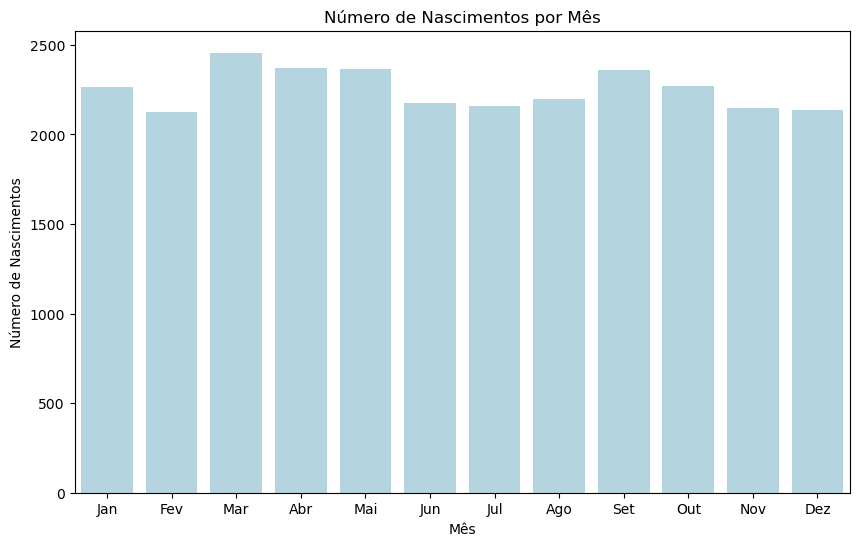

In [63]:
#distribuição de nascimentos ao longo dos meses do ano.

nascimentos_por_mes = sinasc_analise['MESNASC'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=nascimentos_por_mes.index, y=nascimentos_por_mes.values, color='lightblue')
plt.title('Número de Nascimentos por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Nascimentos')
plt.xticks(range(12), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.show()

#o mes que lidera em quantidade de nascimento é março, seguido por abril, maio e setembro.

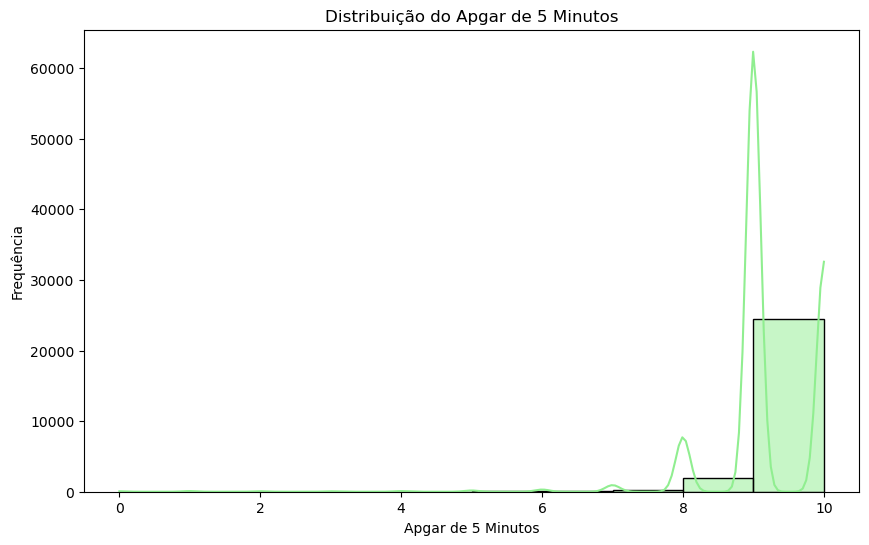

In [64]:
#distribuição da frequencia do APGR5.

plt.figure(figsize=(10, 6))
sns.histplot(sinasc_analise['APGAR5'], bins=10, kde=True, color='lightgreen')
plt.title('Distribuição do Apgar de 5 Minutos')
plt.xlabel('Apgar de 5 Minutos')
plt.ylabel('Frequência')
plt.show()

#a maioria do resultado no Apgar5 é bom, sendo superior a 8.

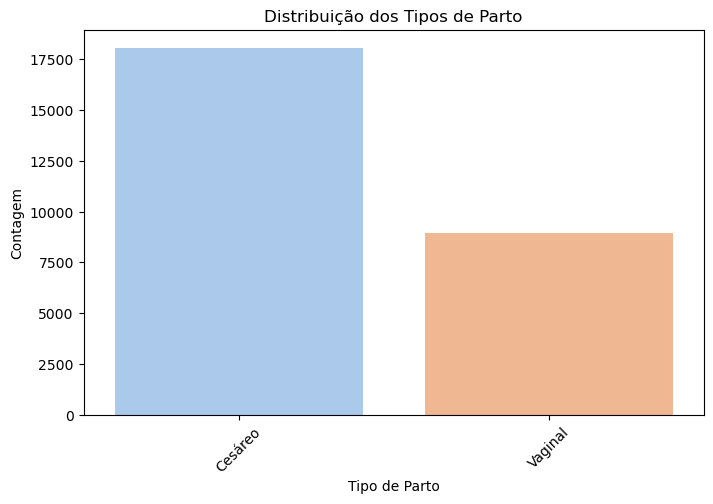

In [65]:
#distribuição dos tipos de parto.

plt.figure(figsize=(8, 5))
sns.countplot(x='PARTO', data=sinasc_analise, palette='pastel')
plt.title('Distribuição dos Tipos de Parto')
plt.xlabel('Tipo de Parto')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

#o parto cesario supera o vaginal, trazendo uma frequencia equivalente ao dobro.

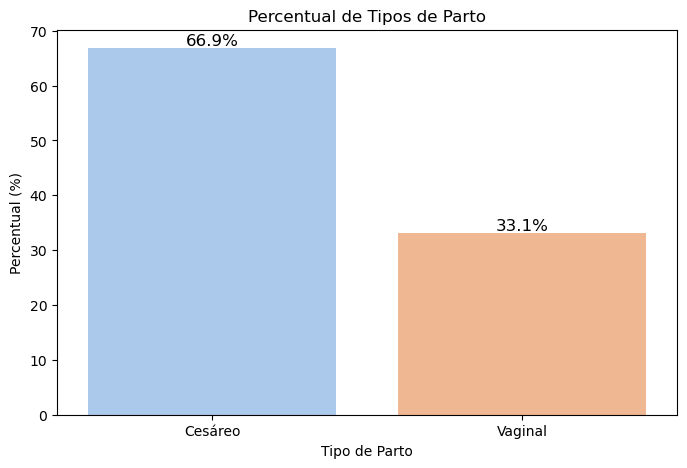

In [66]:
#comparando tipo de parto em %.

# Contagem de tipos de parto
contagem_parto = sinasc_analise['PARTO'].value_counts()

# Calculando percentuais
percentuais = contagem_parto / contagem_parto.sum() * 100

# Plotando o gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=percentuais.index, y=percentuais.values, palette='pastel')
plt.title('Percentual de Tipos de Parto')
plt.xlabel('Tipo de Parto')
plt.ylabel('Percentual (%)')

# Adicionando rótulos de percentual acima das barras
for i, perc in enumerate(percentuais):
    plt.text(i, perc + 0.5, f'{perc:.1f}%', ha='center', fontsize=12)

plt.show()

#confirmacao do grafico acima, mostrando que cerca de 70% dos partos sao cesarianas. Apenas um terço sendo normal (vaginal).

In [11]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [12]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [13]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')